In [1]:
#import libary for use method
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#pandas
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)

In [2]:
email=pd.read_csv('messages.csv')

In [3]:
email.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
email.message[10]

'groningen assembly on language acquisition 1995 university of groningen the netherlands 7 - 9 september 1995 the conference aims to bring together researchers willing to discuss the merits and constraints of different theoretical approaches to language acquisition , in particular generative linguistics , constructionism , dynamic systems modelling , and connectionism . invited speakers harald clahsen university of essex annette karmiloff - smith mrc london kim plunkett university of oxford luigi rizzi university of geneva paul van geert university of groningen abstract submissions abstracts may cover all aspects of language acquisition relating to the core areas of linguistics , including phonology , morphology , syntax , semantics and the interfaces . selection of abstracts will be based on not only their quality but also their potential to contribute to the conference \'s interactive objective . abstract submissions should include : 1 . five ( 5 ) copies of a one-page , double-space

In [5]:
email.nunique()

subject    2613
message    2859
label         2
dtype: int64

In [6]:
email.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [7]:
email.drop('subject',axis=1,inplace=True)

In [8]:
print('Shape of Dataset ->',email.shape)

Shape of Dataset -> (2893, 2)


In [9]:
email.tail()

,message,label
2888,hello thanks for stopping by ! ! we have taken...,1
2889,"the list owner of : "" kiddin "" has invited you...",1
2890,"judging from the return post , i must have sou...",0
2891,gotcha ! there are two separate fallacies in t...,0
2892,hello ! i ' m working on a thesis concerning a...,0


In [10]:
print('Label Count in Dataset :-\n',email.label.value_counts())

Label Count in Dataset :-
 0    2412
1     481
Name: label, dtype: int64


In [11]:
#ratio
print('Spam ratio =' ,round(len(email[email['label']==1])/len(email.label),2)*100,'%')
print('NotSpam ratio =' ,round(len(email[email['label']==0])/len(email.label),2)*100,'%')

Spam ratio = 17.0 %
NotSpam ratio = 83.0 %


In [12]:
#New column for length of message
email['length']=email.message.str.len()
email.head()

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [13]:
#converting all message to lower case
email['message']=email['message'].str.lower()

In [14]:
#Replace email address with 'email'
email['message']=email['message'].str.replace(r'^.+@[^\.].*\[a-z]{2,}$','emailaddress')
#Replace URLs with 'webaddress'
email['message']=email['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')
#Replace money symbol with 'moneysymb'(£ can type with ALT key+156)
email['message']=email['message'].str.replace(r'£|\$','dollers')
#Replace 10 digit phone number(format include paranthesis, space, no spaces,dashes) with 'phone number'
email['message']=email['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
#Replace number with 'numbr'
email['message']=email['message'].str.replace(r'^\d+(\.\d+)?','numbr')


In [15]:
#Remove punctuation
email['message']=email['message'].str.replace(r'[^\w\d\s]',' ')
#replace whitespace between terms with a single space
email['message']=email['message'].str.replace(r'\s+',' ')
#remove leading and trailing whitespace
email['message']=email['message'].str.replace(r'^\s+|\s+?$',' ')


In [16]:
email.head()

,message,label,length
0,content length 3386 apple iss research center ...,0,2856
1,lang classification grimes joseph e and barbar...,0,1800
2,i am posting this inquiry for sergei atamas sa...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [17]:
email.message[10]

'groningen assembly on language acquisition 1995 university of groningen the netherlands 7 9 september 1995 the conference aims to bring together researchers willing to discuss the merits and constraints of different theoretical approaches to language acquisition in particular generative linguistics constructionism dynamic systems modelling and connectionism invited speakers harald clahsen university of essex annette karmiloff smith mrc london kim plunkett university of oxford luigi rizzi university of geneva paul van geert university of groningen abstract submissions abstracts may cover all aspects of language acquisition relating to the core areas of linguistics including phonology morphology syntax semantics and the interfaces selection of abstracts will be based on not only their quality but also their potential to contribute to the conference s interactive objective abstract submissions should include 1 five 5 copies of a one page double spaced abstract of the paper no posters pre

In [18]:
#remove stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + ['u','ur','4','2','im','dont','doin','ure'])

email['message']=email['message'].apply(lambda x:' '.join(
    term for term in x.split() if term not in stop_words))

In [19]:
email['clean_length']=email.message.str.len()
email.head()

,message,label,length,clean_length
0,content length 3386 apple iss research center ...,0,2856,2142
1,lang classification grimes joseph e barbara f ...,0,1800,1398
2,posting inquiry sergei atamas satamas umabnet ...,0,1435,1024
3,colleague researching differing degrees risk p...,0,324,210
4,earlier morning phone friend mine living south...,0,1046,629


In [20]:
#Total length removal
print('Original Length',email.length.sum())
print('Clean Length',email.clean_length.sum())

Original Length 9344743
Clean Length 6534859


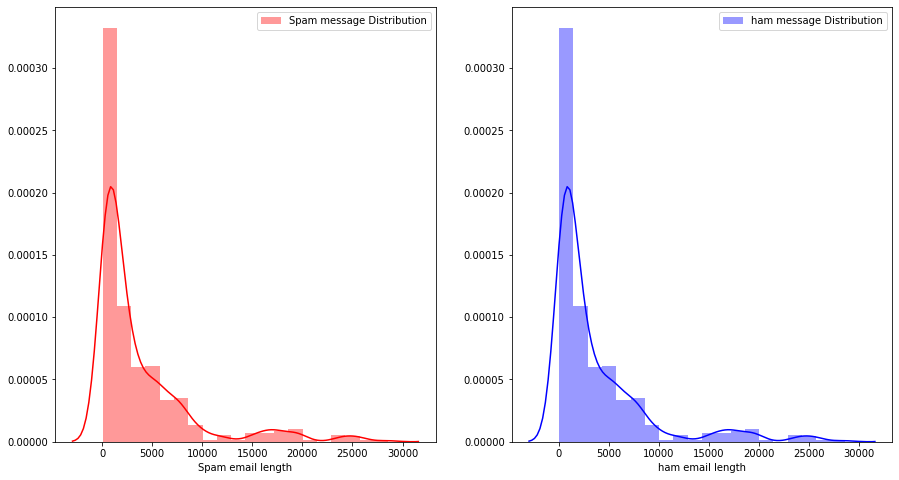

In [21]:
#Message distribution Before cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.distplot(email[email['label']==1]['length'],bins=20,ax=ax[0],label='Spam message Distribution',color='r')
ax[0].set_xlabel('Spam email length')
ax[0].legend()
sns.distplot(email[email['label']==1]['length'],bins=20,ax=ax[1],label='ham message Distribution',color='b')
ax[1].set_xlabel('ham email length')
ax[1].legend()
plt.show()

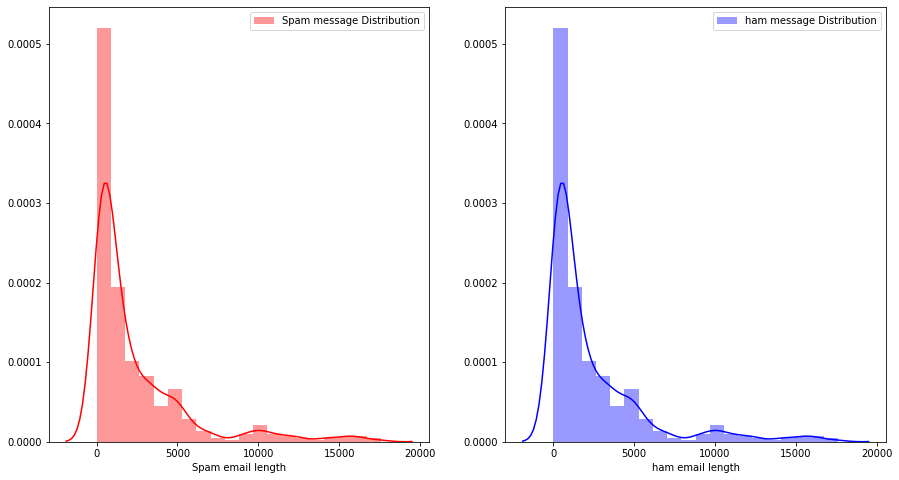

In [22]:
#Message distribution After cleaning
f,ax =plt.subplots(1,2,figsize=(15,8))
sns.distplot(email[email['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam message Distribution',color='r')
ax[0].set_xlabel('Spam email length')
ax[0].legend()
sns.distplot(email[email['label']==1]['clean_length'],bins=20,ax=ax[1],label='ham message Distribution',color='b')
ax[1].set_xlabel('ham email length')
ax[1].legend()
plt.show()

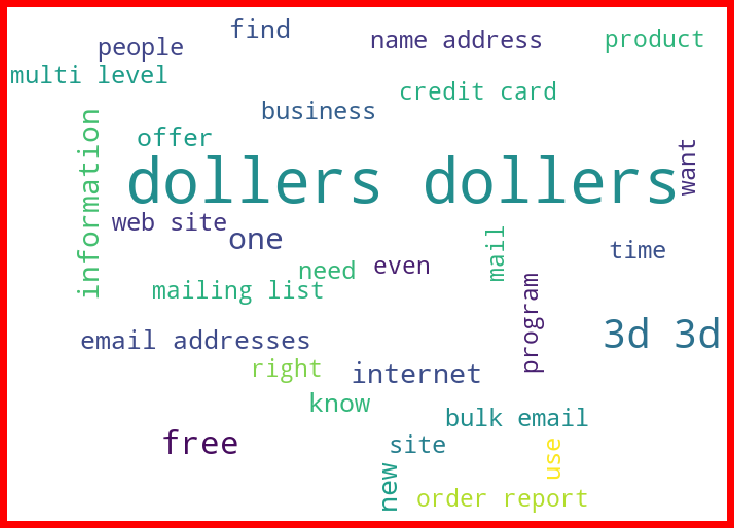

In [23]:
#getting sense of loud word in spam
from wordcloud import WordCloud

spams=email['message'][email['label']==1]

spams_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(spams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spams_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

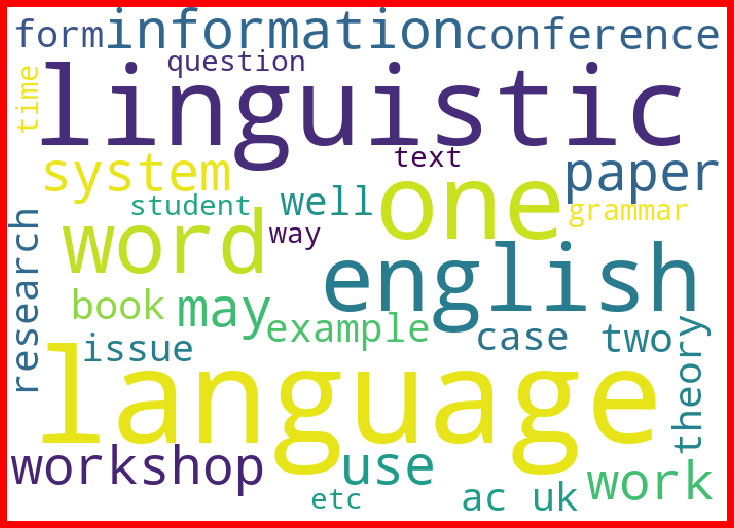

In [24]:
#getting sense of loud word in ham
from wordcloud import WordCloud

hams=email['message'][email['label']==0]

hams_cloud=WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(hams_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
#1.convert text into vectors using TF-IDF
#2.Instantiate MultinomialNB Classifer
#3.Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

tf_vec =TfidfVectorizer()
native =MultinomialNB()
features = tf_vec.fit_transform(email['message'])

x=features
y=email['label']

In [28]:
#Train and predict
X_train,x_test,Y_train,y_test =train_test_split(x,y,random_state=42)
native.fit(X_train,Y_train)
y_pred=native.predict(x_test)
print('Final score ==> ',accuracy_score(y_test,y_pred))

Final score ==>  0.8328729281767956


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       585
           1       1.00      0.13      0.23       139

    accuracy                           0.83       724
   macro avg       0.91      0.56      0.57       724
weighted avg       0.86      0.83      0.78       724



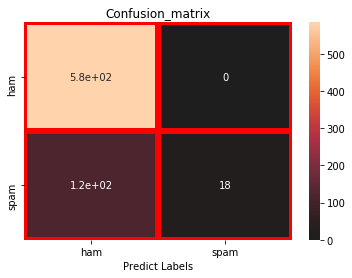

In [31]:
#plot confusion matrix heatmap
conf_mat=confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predict Labels')
ax.set_title('Confusion_matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [32]:
conf_mat

array([[585,   0],
       [121,  18]], dtype=int64)